In [1]:
import os
host_addr = '/Users/bing/Documents/GitHub/PYVA/'
os.chdir(host_addr+'pymph')
import config
import pygds
import pymph
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Double Dots

## - without screening gate

In [89]:
data = np.load(host_addr+'npz/double_dot.npz')
dotarr = data['dotarr']
ci     = data['ci']

cii = np.array([c for c in ci[:,0,0] if c != 0])
cij = np.array([c for c in ci[:,0,1] if c != 0])
dotarr = np.array([a for a, b in zip(dotarr, ci[:,0,0]) if b != 0])
dotarr = dotarr/2

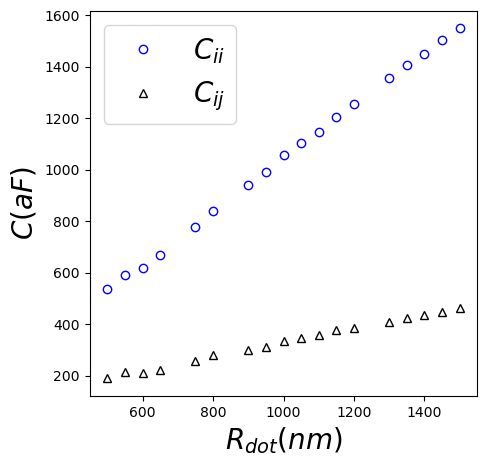

In [90]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr,cii,'o', color = 'blue', markerfacecolor='none', label = r'$C_{ii}$')
ax1.plot(dotarr,abs(cij),'^', color = 'black', markerfacecolor='none', label = r'$C_{ij}$')

ax1.set_ylabel(r'$C (aF)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)
ax1.legend(loc='best', fontsize = 20)

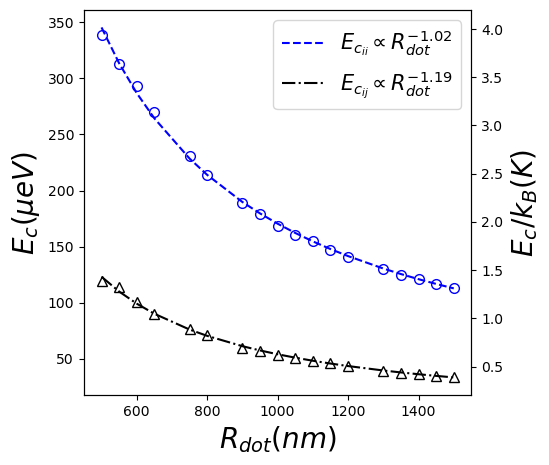

In [91]:
def func1(x, a, b):
    return a*(1/x**b)

E_cii = (1.6e-19)**2 * (cii / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6
E_cij = (1.6e-19)**2 * (abs(cij) / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6

popt1, pcov1 = curve_fit(func1, dotarr, E_cii)
popt2, pcov1 = curve_fit(func1, dotarr, E_cij)


fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr, E_cii,'o',color = 'blue', markerfacecolor='none', markersize = 7)
ax1.plot(dotarr, E_cij,'^',color = 'black', markerfacecolor='none', markersize = 7)

ax1.plot(dotarr, func1(dotarr, popt1[0], popt1[1]), linestyle = '--',\
         color = 'blue',label = r'$E_{c_{ii}}\propto R_{dot}^{'+str(-round(popt1[1],2))+r'}$')
ax1.plot(dotarr, func1(dotarr, popt2[0], popt2[1]), linestyle = '-.',\
         color = 'black',label = r'$E_{c_{ij}}\propto R_{dot}^{'+str(-round(popt2[1],2))+r'}$')


ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim()[0] / 86, ax1.get_ylim()[1] / 86)
ax1.set_ylabel(r'$E_c (\mu eV)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)
ax2.set_ylabel(r'$E_c/k_B(K)$', fontsize = 20)
ax1.legend(loc='best', fontsize = 15)
plt.savefig('RRR', dpi=500, bbox_inches='tight')

Text(0.5, 0, '$R_{dot}(nm)$')

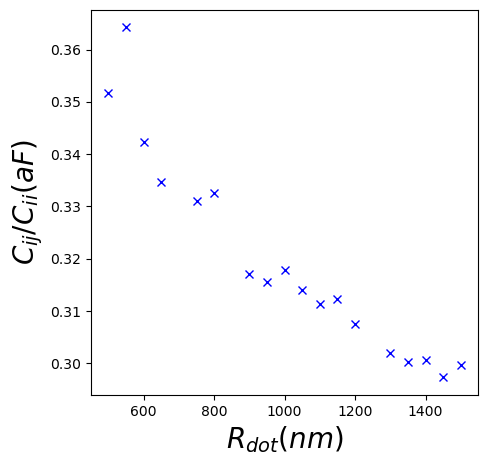

In [92]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr,abs(cij)/cii,'x', color = 'blue', markerfacecolor='none')
ax1.set_ylabel(r'$C_{ij}/C_{ii} (aF)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)

thoughts:

- we want both $E_{C_{ii}}$ and $E_{C_{ij}}$ to be large because of the robustness in the temperature they offer. But at the same time they should be small enough such that we can resolve the Kondo temperature. 

- the reduced capacitance is the highest when the dot radius is smaller. 

## - with full screening gate

In [97]:
data = np.load(host_addr+'npz/double_dot_fscreen.npz')
dotarr = data['dotarr']
ci     = data['ci']
cii = np.array([c for c in ci[:,0,0] if c != 0])
cij = np.array([c for c in ci[:,0,1] if c != 0])
dotarr = np.array([a for a, b in zip(dotarr, ci[:,0,0]) if b != 0])
dotarr = dotarr/2

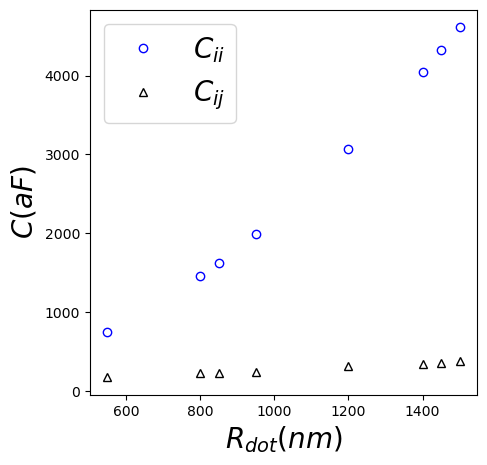

In [98]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr,cii,'o', color = 'blue', markerfacecolor='none', label = r'$C_{ii}$')
ax1.plot(dotarr,abs(cij),'^', color = 'black', markerfacecolor='none', label = r'$C_{ij}$')

ax1.set_ylabel(r'$C (aF)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)
ax1.legend(loc='best', fontsize = 20)

In [95]:
def func1(x, a, b):
    return a*(1/x**b)

E_cii = (1.6e-19)**2 * (cii / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6
E_cij = (1.6e-19)**2 * (abs(cij) / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6


popt1, pcov1 = curve_fit(func1, dotarr, E_cii)
popt2, pcov1 = curve_fit(func1, dotarr, E_cij)


fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr, E_cii,'o',color = 'blue', markerfacecolor='none', markersize = 7)
ax1.plot(dotarr, E_cij,'^',color = 'black', markerfacecolor='none', markersize = 7)

ax1.plot(dotarr, func1(dotarr, popt1[0], popt1[1]), linestyle = '--',\
         color = 'blue',label = r'$E_{c_{ii}}\propto R_{dot}^{'+str(-round(popt1[1],2))+r'}$')
ax1.plot(dotarr, func1(dotarr, popt2[0], popt2[1]), linestyle = '-.',\
         color = 'black',label = r'$E_{c_{ij}}\propto R_{dot}^{'+str(-round(popt2[1],2))+r'}$')


ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim()[0] / 86, ax1.get_ylim()[1] / 86)
ax1.set_ylabel(r'$E_c (\mu eV)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)
ax2.set_ylabel(r'$E_c/k_B(K)$', fontsize = 20)
ax1.legend(loc='best', fontsize = 15)
plt.savefig('RRR', dpi=500, bbox_inches='tight')

ValueError: `ydata` must not be empty!

Text(0.5, 0, '$R_{dot}(nm)$')

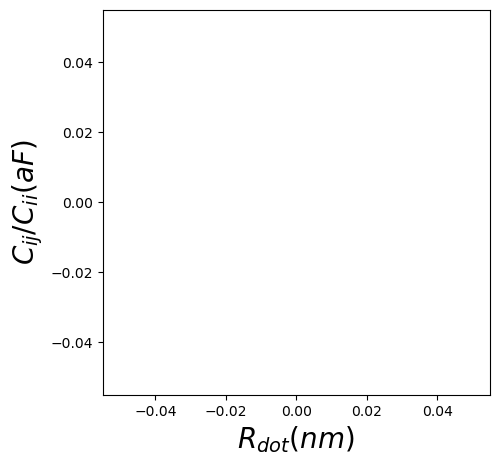

In [96]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr,abs(cij)/cii,'x', color = 'blue', markerfacecolor='none')
ax1.set_ylabel(r'$C_{ij}/C_{ii} (aF)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)

## - comparison

In [78]:
data = np.load(host_addr+'npz/double_dot.npz')
dotarr = data['dotarr']
ci     = data['ci']

cii = np.array([c for c in ci[:,0,0] if c != 0])
cij = np.array([c for c in ci[:,0,1] if c != 0])
dotarr = np.array([a for a, b in zip(dotarr, ci[:,0,0]) if b != 0])
dotarr = dotarr/2


data = np.load(host_addr+'npz/double_dot_fscreen.npz')
dotarr_s = data['dotarr']
ci_s     = data['ci']
cii_s = np.array([c for c in ci_s[:,0,0] if c != 0])
cij_s = np.array([c for c in ci_s[:,0,1] if c != 0])
dotarr_s = np.array([a for a, b in zip(dotarr_s, ci_s[:,0,0]) if b != 0])
dotarr_s = dotarr_s/2

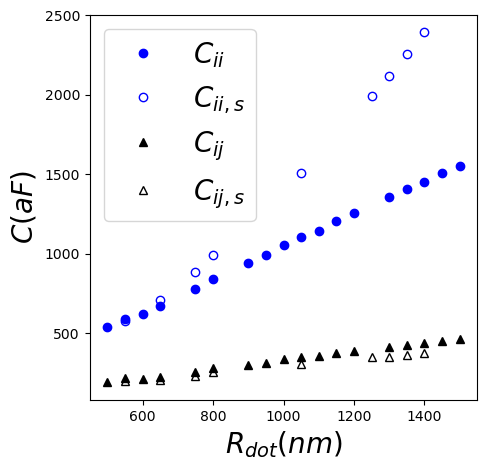

In [79]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr,cii,'o', color = 'blue', label = r'$C_{ii}$')
ax1.plot(dotarr_s,cii_s,'o', color = 'blue', markerfacecolor='none', label = r'$C_{ii,s}$')
ax1.plot(dotarr,abs(cij),'^', color = 'black', label = r'$C_{ij}$')
ax1.plot(dotarr_s,abs(cij_s),'^', color = 'black', markerfacecolor='none', label = r'$C_{ij,s}$')

ax1.set_ylabel(r'$C (aF)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)
ax1.legend(loc='best', fontsize = 20)

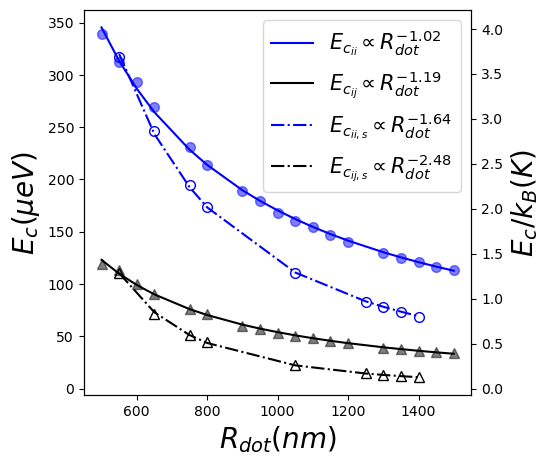

In [80]:
def func1(x, a, b):
    return a*(1/x**b)

E_cii = (1.6e-19)**2 * (cii / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6
E_cij = (1.6e-19)**2 * (abs(cij) / (cii**2 - cij**2)) *1e18 * 6.242e18 * 1e6

E_cii_s = (1.6e-19)**2 * (cii_s / (cii_s**2 - cij_s**2)) *1e18 * 6.242e18 * 1e6
E_cij_s = (1.6e-19)**2 * (abs(cij_s) / (cii_s**2 - cij_s**2)) *1e18 * 6.242e18 * 1e6


popt1, pcov1 = curve_fit(func1, dotarr, E_cii)
popt2, pcov2 = curve_fit(func1, dotarr, E_cij)
popt1s, pcov1s = curve_fit(func1, dotarr_s, E_cii_s)
popt2s, pcov2s = curve_fit(func1, dotarr_s, E_cij_s)



fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr, E_cii,'o',color = 'blue', markersize = 7, alpha = 0.5)
ax1.plot(dotarr, E_cij,'^',color = 'black', markersize = 7, alpha = 0.5)
ax1.plot(dotarr_s, E_cii_s,'o',color = 'blue', markerfacecolor='none', markersize = 7)
ax1.plot(dotarr_s, E_cij_s,'^',color = 'black', markerfacecolor='none', markersize = 7)

ax1.plot(dotarr, func1(dotarr, popt1[0], popt1[1]), linestyle = '-',\
         color = 'blue',label = r'$E_{c_{ii}}\propto R_{dot}^{'+str(-round(popt1[1],2))+r'}$')
ax1.plot(dotarr, func1(dotarr, popt2[0], popt2[1]), linestyle = '-',\
         color = 'black',label = r'$E_{c_{ij}}\propto R_{dot}^{'+str(-round(popt2[1],2))+r'}$')
ax1.plot(dotarr_s, func1(dotarr_s, popt1s[0], popt1s[1]), linestyle = '-.',\
         color = 'blue',label = r'$E_{c_{ii,s}}\propto R_{dot}^{'+str(-round(popt1s[1],2))+r'}$')
ax1.plot(dotarr_s, func1(dotarr_s, popt2s[0], popt2s[1]), linestyle = '-.',\
         color = 'black',label = r'$E_{c_{ij,s}}\propto R_{dot}^{'+str(-round(popt2s[1],2))+r'}$')


ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim()[0] / 86, ax1.get_ylim()[1] / 86)
ax1.set_ylabel(r'$E_c (\mu eV)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)
ax2.set_ylabel(r'$E_c/k_B(K)$', fontsize = 20)
ax1.legend(loc='best', fontsize = 15)
plt.savefig('RRR', dpi=500, bbox_inches='tight')

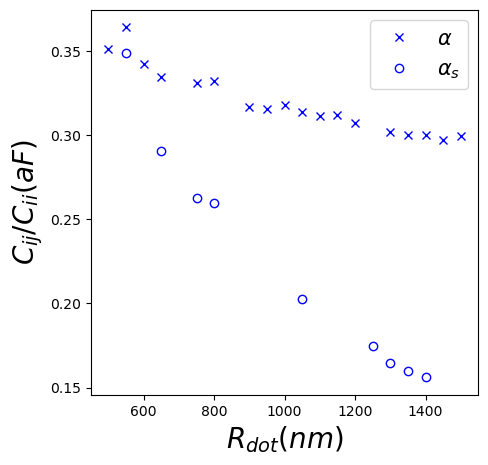

In [82]:
fig, ax1 = plt.subplots(figsize=(5,5))
ax1.plot(dotarr,abs(cij)/cii,'x', color = 'blue', markerfacecolor='none', label = r'$\alpha$')
ax1.plot(dotarr_s,abs(cij_s)/cii_s,'o', color = 'blue', markerfacecolor='none', label = r'$\alpha_s$')
ax1.set_ylabel(r'$C_{ij}/C_{ii} (aF)$', fontsize = 20)
ax1.set_xlabel(r'$R_{dot}(nm)$', fontsize = 20)
ax1.legend(loc='best', fontsize = 15)

# Quadruple Dots

## without screening gate

In [18]:
def pop_zeros(matrices, array):
    
    # Initialize lists to hold the new matrices and array
    new_matrices = []
    new_array = []

    # Iterate through matrices and corresponding elements in the array
    for i in range(len(matrices)):
        matrix = matrices[i]
        if np.count_nonzero(matrix) == matrix.size:
            # If there are no zero elements in the matrix, preserve it
            new_matrices.append(matrix)
            new_array.append(array[i])

    return np.array(new_matrices), np.array(new_array)

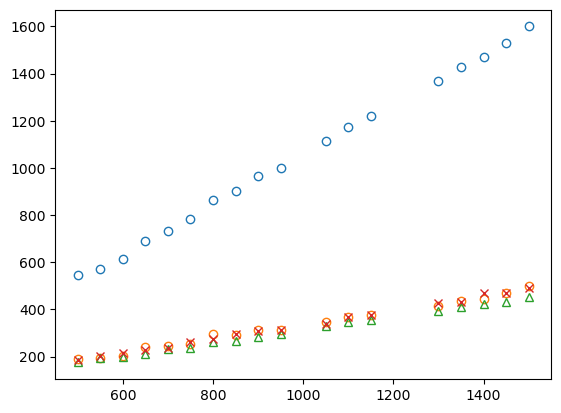

In [88]:
data = np.load(host_addr+'npz/four_dot.npz')
dotarr = data['dotarr']
ci     = data['ci']

ci, dotarr = pop_zeros(ci, dotarr)
dotarr = dotarr/2

plt.plot(dotarr,abs(ci[:,0,0]),'o',markerfacecolor='none', label=r'$C_{12}$')
plt.plot(dotarr,abs(ci[:,0,1]),'o',markerfacecolor='none', label=r'$C_{12}$')
plt.plot(dotarr,abs(ci[:,1,2]),'^',markerfacecolor='none', label=r'$C_{23}}$')
plt.plot(dotarr,abs(ci[:,2,3]),'x',markerfacecolor='none', label=r'$C_{24}$')